<a href="https://colab.research.google.com/github/Psyclophe/Power-PDF/blob/master/GaussianMixture_smm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import patches 
 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture as GMM 
from sklearn.model_selection import StratifiedKFold

# Load the iris dataset 
iris = datasets.load_iris()
# Split dataset into training and testing (80/20 split) 
indices = StratifiedKFold(n_splits=5) #el data set se divide en 5 partes
# Take the first fold 
train_index, test_index = next(indices.split(iris["data"], iris.target))
 
# Extract training data and labels 
X_train = iris.data[train_index] 
y_train = iris.target[train_index]
# Extract testing data and labels 
X_test = iris.data[test_index] 
y_test = iris.target[test_index]

# Extract the number of classes 
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [ ]:
# Build GMM 
classifier = GMM(n_components=num_classes, covariance_type='full',  
        init_params='kmeans', max_iter=20) #n_iter : num de iter de EM, wc pesos y covarianzas se actualizan en cada iteración
# Initialize the GMM means  
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0) 
                              for i in range(num_classes)])
print(classifier.means_)

[[5.0425 3.4575 1.465  0.2525]
 [5.895  2.745  4.2325 1.3125]
 [6.5925 2.9825 5.4975 2.0225]]


In [ ]:
# Train the GMM classifier  
classifier.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


GaussianMixture(max_iter=20, n_components=3)

Accuracy on training data = 4.166666666666666
Accuracy on testing data = 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


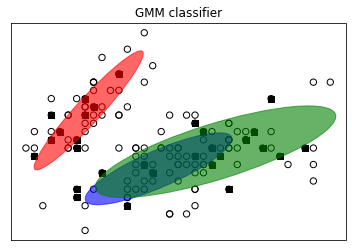

In [ ]:
# Draw boundaries 
plt.figure() 
colors = 'bgr'  #colores rgb
for i, color in enumerate(colors): 
    # Extract eigenvalues and eigenvectors 
    eigenvalues, eigenvectors = np.linalg.eigh( 
            classifier.covariances_[i][:2, :2]) #valores y vectores propios de la matriz de covarianzas de 2x2 (2dimensiones)
    
     # Normalize the first eigenvector 
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])    
    # Extract the angle of tilt 
    angle = np.arctan2(norm_vec[1], norm_vec[0]) 
    angle = 180 * angle / np.pi
    # Scaling factor to magnify the ellipses 
    # (random value chosen to suit our needs) 
    scaling_factor = 8 
    eigenvalues *= scaling_factor
    # Draw the ellipse 
    ellipse = patches.Ellipse(classifier.means_[i, :2],  
    eigenvalues[0], eigenvalues[1], 180 + angle,  
    color=color) 
    axis_handle = plt.subplot(1, 1, 1) 
    ellipse.set_clip_box(axis_handle.bbox) 
    ellipse.set_alpha(0.6)  #transparencia
    axis_handle.add_artist(ellipse)

# Plot the data  
colors = 'bgr' 
for i, color in enumerate(colors): 
    cur_data = iris.data[iris.target == i] 
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',  
            facecolors='none', edgecolors='black', s=40,  
            label=iris.target_names[i])
    
    test_data = X_test[y_test == i] 
    plt.scatter(test_data[:,0], test_data[:,1], marker='s',  
            facecolors='black', edgecolors='black', s=40,  
            label=iris.target_names[i])
# Compute predictions for training and testing data 
y_train_pred = classifier.predict(X_train) 
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training) 
 
y_test_pred = classifier.predict(X_test) 
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100 
print('Accuracy on testing data =', accuracy_testing) 
 
plt.title('GMM classifier') 
plt.xticks(()) 
plt.yticks(()) 
 
plt.show()

In [ ]:
classifier.covariances_

array([[[0.20606642, 0.06753688, 0.14621326, 0.04491749],
        [0.06753688, 0.08584992, 0.07554969, 0.04052257],
        [0.14621326, 0.07554969, 0.1925913 , 0.05839389],
        [0.04491749, 0.04052257, 0.05839389, 0.03172168]],

       [[0.3457733 , 0.08355099, 0.27586887, 0.05578471],
        [0.08355099, 0.11118528, 0.07696636, 0.04872812],
        [0.27586887, 0.07696636, 0.30174126, 0.06575891],
        [0.05578471, 0.04872812, 0.06575891, 0.0843744 ]],

       [[0.12644475, 0.10030625, 0.0152375 , 0.00951875],
        [0.10030625, 0.15044475, 0.0100125 , 0.00673125],
        [0.0152375 , 0.0100125 , 0.034276  , 0.0063375 ],
        [0.00951875, 0.00673125, 0.0063375 , 0.01199475]]])